In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the CSV file to analyze the data
data = pd.read_csv("statsfinal.csv")
print(data.head())

   Unnamed: 0        Date  Q-P1  Q-P2  Q-P3  Q-P4      S-P1      S-P2  \
0           0  13-06-2010  5422  3725   576   907  17187.74  23616.50   
1           1  14-06-2010  7047   779  3578  1574  22338.99   4938.86   
2           2  15-06-2010  1572  2082   595  1145   4983.24  13199.88   
3           3  16-06-2010  5657  2399  3140  1672  17932.69  15209.66   
4           4  17-06-2010  3668  3207  2184   708  11627.56  20332.38   

       S-P3      S-P4  
0   3121.92   6466.91  
1  19392.76  11222.62  
2   3224.90   8163.85  
3  17018.80  11921.36  
4  11837.28   5048.04  


In [3]:
# Display basic statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())


        Unnamed: 0         Q-P1         Q-P2         Q-P3         Q-P4  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean   2299.500000  4121.849130  2130.281522  3145.740000  1123.500000   
std    1328.049949  2244.271323  1089.783705  1671.832231   497.385676   
min       0.000000   254.000000   251.000000   250.000000   250.000000   
25%    1149.750000  2150.500000  1167.750000  1695.750000   696.000000   
50%    2299.500000  4137.000000  2134.000000  3202.500000  1136.500000   
75%    3449.250000  6072.000000  3070.250000  4569.000000  1544.000000   
max    4599.000000  7998.000000  3998.000000  6000.000000  2000.000000   

               S-P1          S-P2          S-P3          S-P4  
count   4600.000000   4600.000000   4600.000000   4600.000000  
mean   13066.261743  13505.984848  17049.910800   8010.555000  
std     7114.340094   6909.228687   9061.330694   3546.359869  
min      805.180000   1591.340000   1355.000000   1782.500000  
25%     6817.

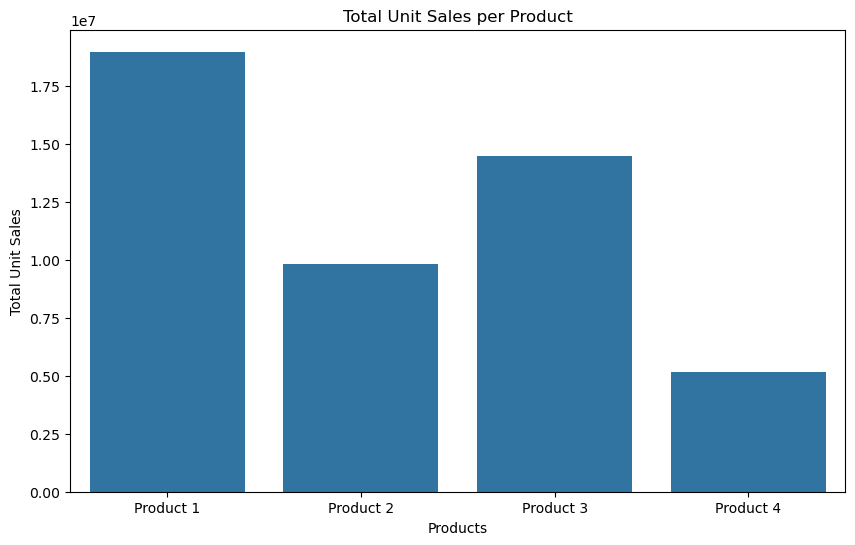

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=['Product 1', 'Product 2', 'Product 3', 'Product 4'], 
    y=[
        data['Q-P1'].sum(), 
        data['Q-P2'].sum(), 
        data['Q-P3'].sum(), 
        data['Q-P4'].sum()
    ]
)
plt.title('Total Unit Sales per Product')
plt.xlabel('Products')
plt.ylabel('Total Unit Sales')
plt.show()



Rows with invalid dates:
      Unnamed: 0 Date  Q-P1  Q-P2  Q-P3  Q-P4      S-P1      S-P2      S-P3  \
109          109  NaT  4986   342  4978   558  15805.62   2168.28  26980.76   
170          170  NaT  4632  3930   523  1581  14683.44  24916.20   2834.66   
473          473  NaT  2242   401  5926   789   7107.14   2542.34  32118.92   
534          534  NaT   325  3476  4588  1771   1030.25  22037.84  24866.96   
836          836  NaT  1003   256  1346  1449   3179.51   1623.04   7295.32   
897          897  NaT  2509  2666  4146   593   7953.53  16902.44  22471.32   
1200        1200  NaT   597   709  5470  1994   1892.49   4495.06  29647.40   
1261        1261  NaT  7681  1235   347  1087  24348.77   7829.90   1880.74   
1564        1564  NaT  5333   833  3494   618  16905.61   5281.22  18937.48   
1625        1625  NaT  3870  2779  3246  1290  12267.90  17618.86  17593.32   
1928        1928  NaT  3583  2111  4225  1401  11358.11  13383.74  22899.50   
1989        1989  NaT  7516

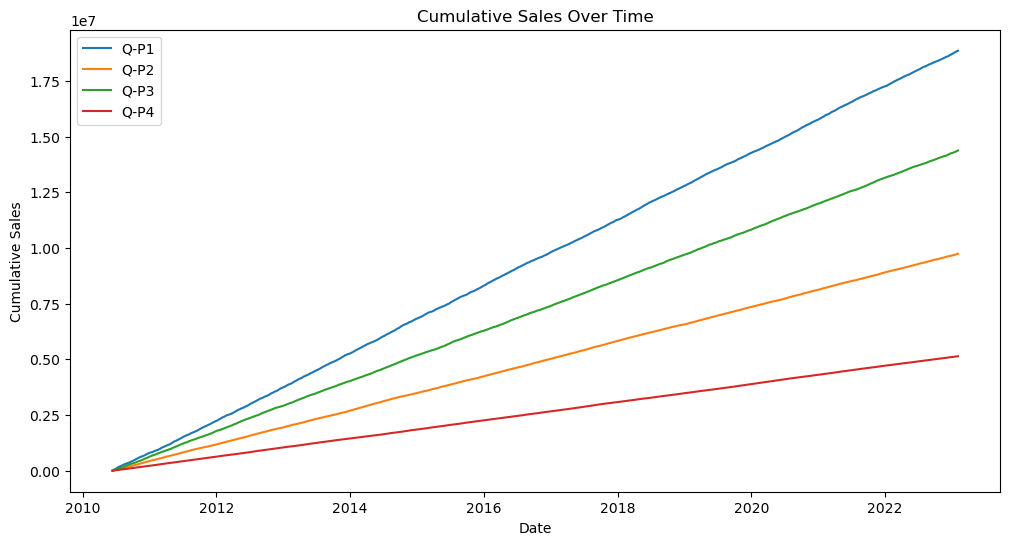

In [7]:
# Convert Date column to datetime, handling errors and specifying day-first format
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True, errors='coerce')

# Check for rows with invalid dates
invalid_dates = data[data['Date'].isna()]
print("Rows with invalid dates:")
print(invalid_dates)

# Drop rows with invalid dates if necessary
data = data.dropna(subset=['Date'])

# Now proceed with plotting or analysis
plt.figure(figsize=(12, 6))
for product in ['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4']:
    plt.plot(data['Date'], data[product].cumsum(), label=product)
plt.title('Cumulative Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Sales')
plt.legend()
plt.show()


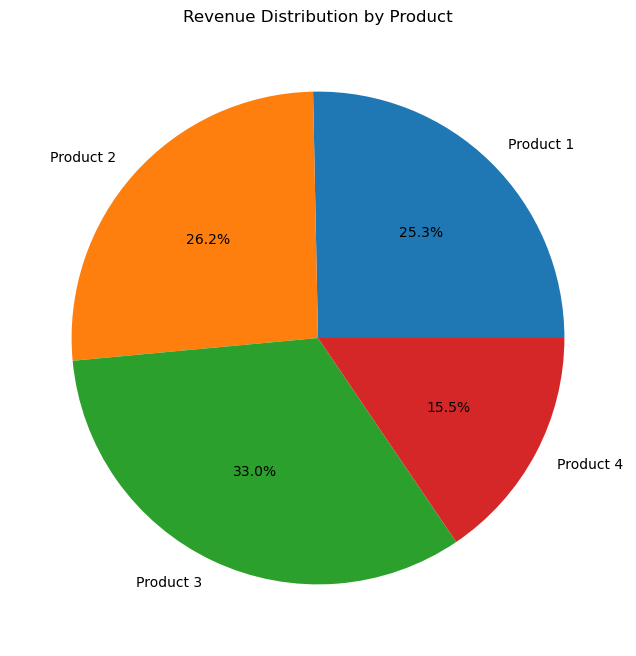

In [9]:
plt.figure(figsize=(8, 8))
plt.pie(
    [data['S-P1'].sum(), data['S-P2'].sum(), data['S-P3'].sum(), data['S-P4'].sum()],
    labels=['Product 1', 'Product 2', 'Product 3', 'Product 4'],
    autopct='%1.1f%%'
)
plt.title('Revenue Distribution by Product')
plt.show()


In [10]:
# Calculate total revenue
total_revenue = {
    'Product 1': data['S-P1'].sum(),
    'Product 2': data['S-P2'].sum(),
    'Product 3': data['S-P3'].sum(),
    'Product 4': data['S-P4'].sum()
}

print("Total Revenue:", total_revenue)


Total Revenue: {'Product 1': 59786735.730000004, 'Product 2': 61759658.14, 'Product 3': 77937448.26, 'Product 4': 36648050.269999996}
